In [23]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
train = pd.read_csv('Email spam.csv')

In [25]:
train

,Id,spam,text
0,1.0,1.0,Subject: naturally irresistible your corporate...
1,2.0,1.0,Subject: the stock trading gunslinger fanny i...
2,3.0,1.0,Subject: unbelievable new homes made easy im ...
3,4.0,1.0,Subject: 4 color printing special request add...
4,5.0,1.0,"Subject: do not have money , get software cds ..."
...,...,...,...
2905,2909.0,0.0,Subject: re : term papers please respond to ...
2906,2910.0,0.0,Subject: re : actions on anjam ' s resignation...
2907,2911.0,0.0,"Subject: india database jim / wade , as you ..."
2908,2912.0,0.0,Subject: re : invitation - wharton et events ...


In [26]:
#
train=train.dropna()

In [27]:
train

,Id,spam,text
0,1.0,1.0,Subject: naturally irresistible your corporate...
1,2.0,1.0,Subject: the stock trading gunslinger fanny i...
2,3.0,1.0,Subject: unbelievable new homes made easy im ...
3,4.0,1.0,Subject: 4 color printing special request add...
4,5.0,1.0,"Subject: do not have money , get software cds ..."
...,...,...,...
2905,2909.0,0.0,Subject: re : term papers please respond to ...
2906,2910.0,0.0,Subject: re : actions on anjam ' s resignation...
2907,2911.0,0.0,"Subject: india database jim / wade , as you ..."
2908,2912.0,0.0,Subject: re : invitation - wharton et events ...


In [28]:
train['spam'].unique()

array([1., 0.])

In [29]:
train[train['spam']=='its termination would not  have such a phenomenal impact on the power situation .  however '].shape

(0, 3)

In [30]:
#df1 = df.dropna(axis=1)

In [31]:
df_x=train['text']
df_y=train['spam']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3, random_state=9)
print(x_train.shape)
print(x_test.shape)

(2035,)
(873,)


In [33]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer= TfidfVectorizer(min_df=1,stop_words='english')

In [35]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 


In [36]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(tfidf_train,y_train)
clf.score(tfidf_train,y_train)

0.9980343980343981

In [37]:
tfidf_test = tfidf_vectorizer.transform(x_test) 

In [38]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(tfidf_test )
accuracy_score(y_pred,y_test)

0.9782359679266895

In [39]:
import sklearn.metrics

In [40]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       442
         1.0       1.00      0.96      0.98       431

    accuracy                           0.98       873
   macro avg       0.98      0.98      0.98       873
weighted avg       0.98      0.98      0.98       873



In [41]:
y_pred = clf.predict(tfidf_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[440,   2],
       [ 17, 414]], dtype=int64)

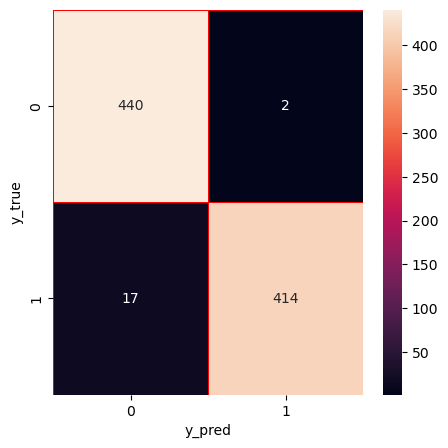

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [43]:
with open('tranform.pickle','wb') as f:
    pickle.dump(tfidf_vectorizer,f)

In [44]:
with open('model.pickle','wb') as f:
    pickle.dump(clf,f)